In [25]:
import matplotlib.pyplot as plt
from utils import plotter
from matplotlib import cm
plt.style.use("support-files/qubit.mplstyle")

MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}

e = 1.6*10**(-19)
nA = 10**(-9)
GHz = 10**9

# 2D Plot

In [43]:
data = np.flip(np.loadtxt("./data/2021-03-01_cqps-shapiro/text-data/NbN61c_DC_Feb2221_dVdI9-3p0000-0-Bessel.txt"))

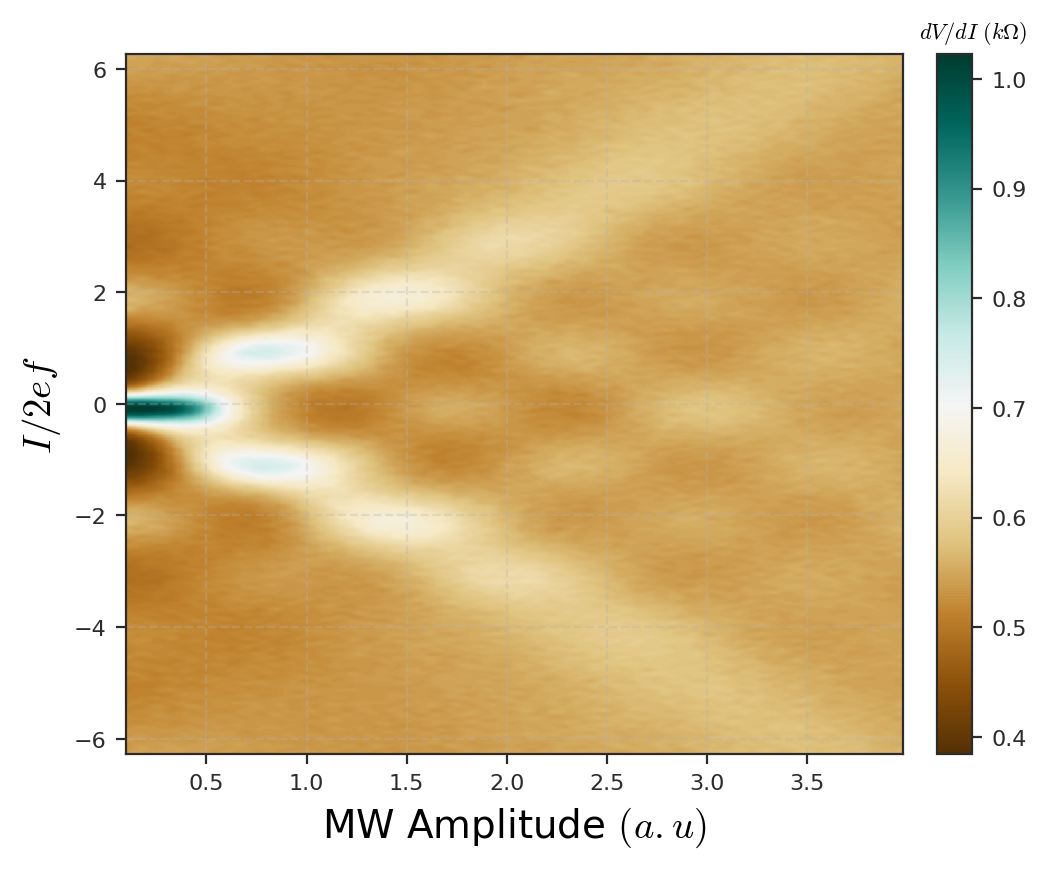

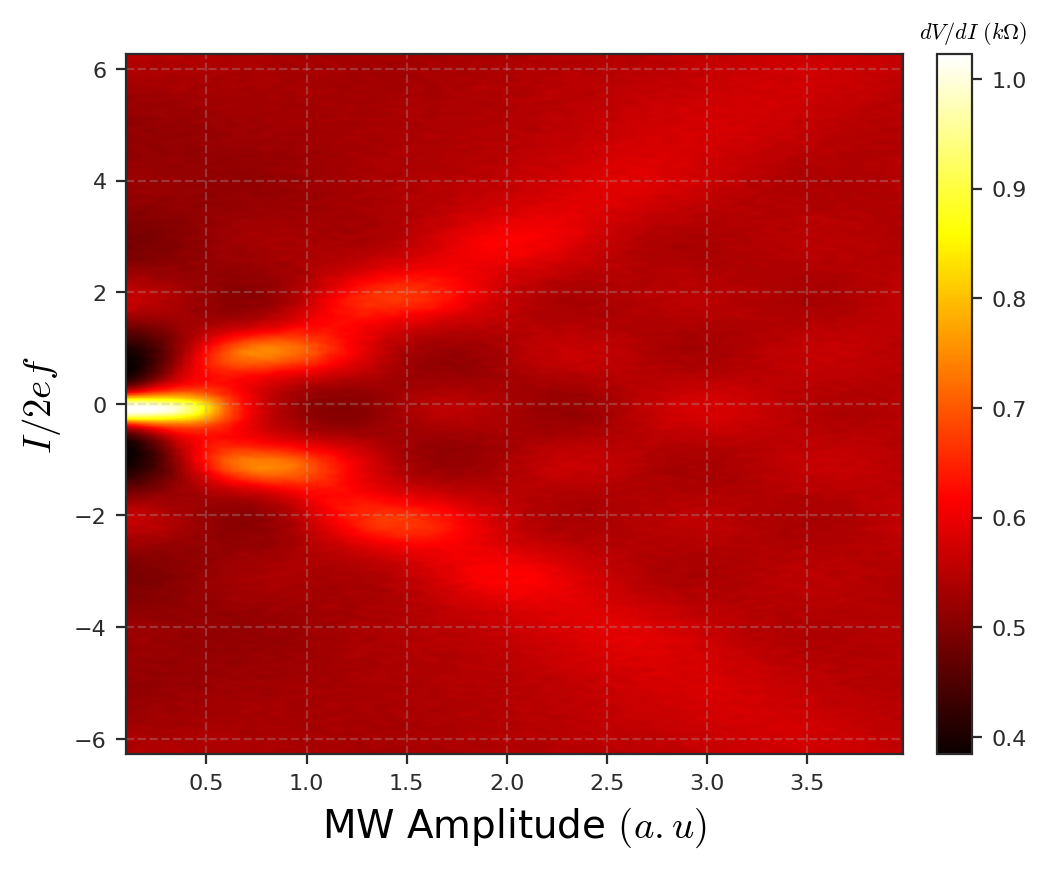

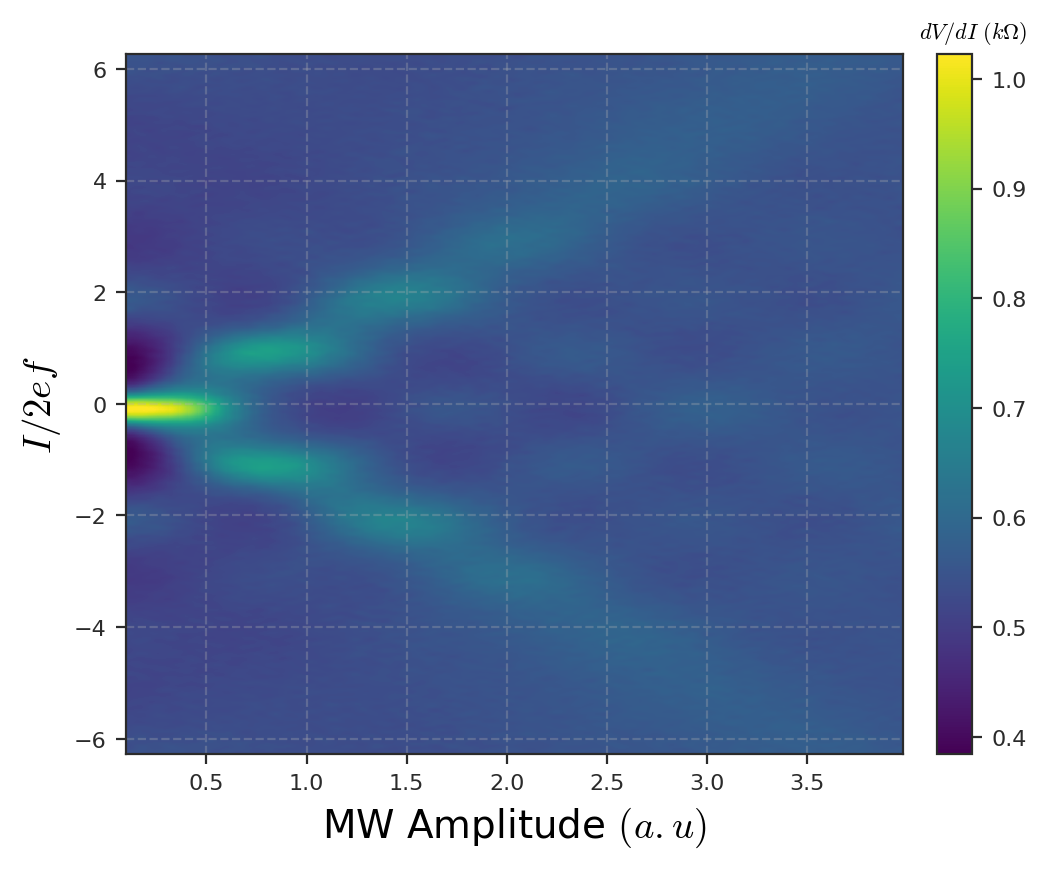

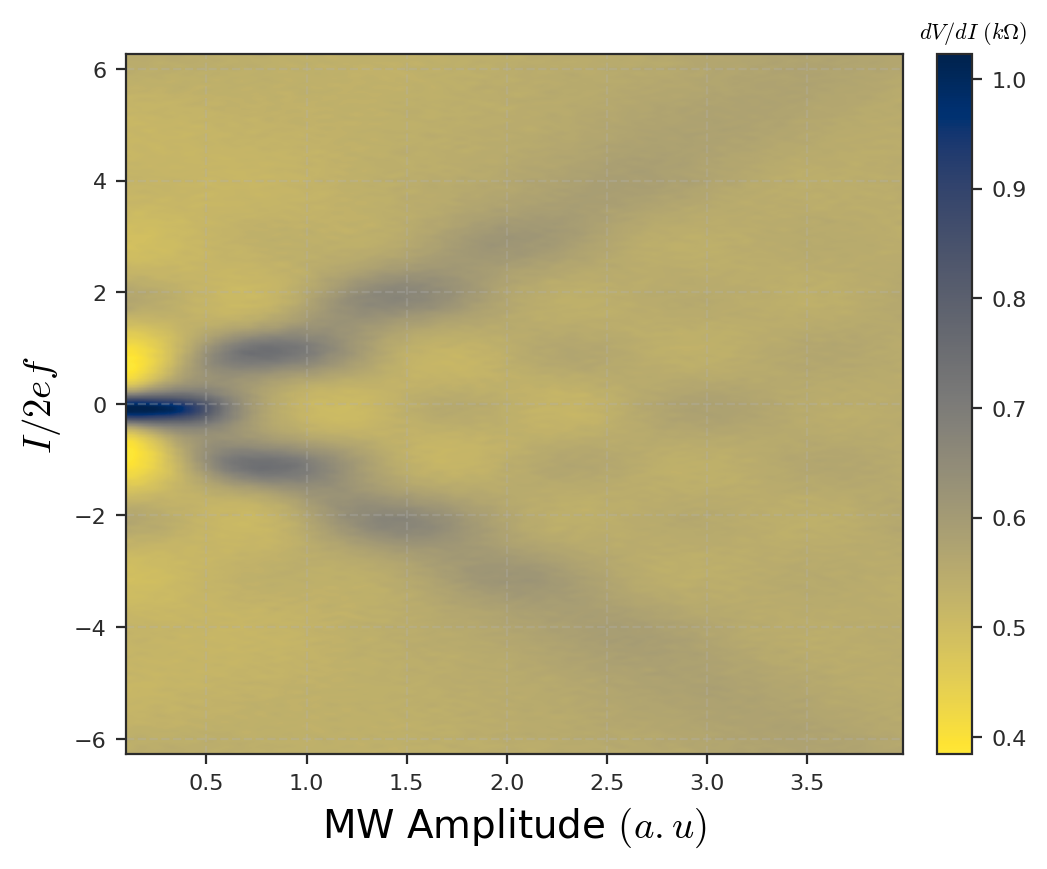

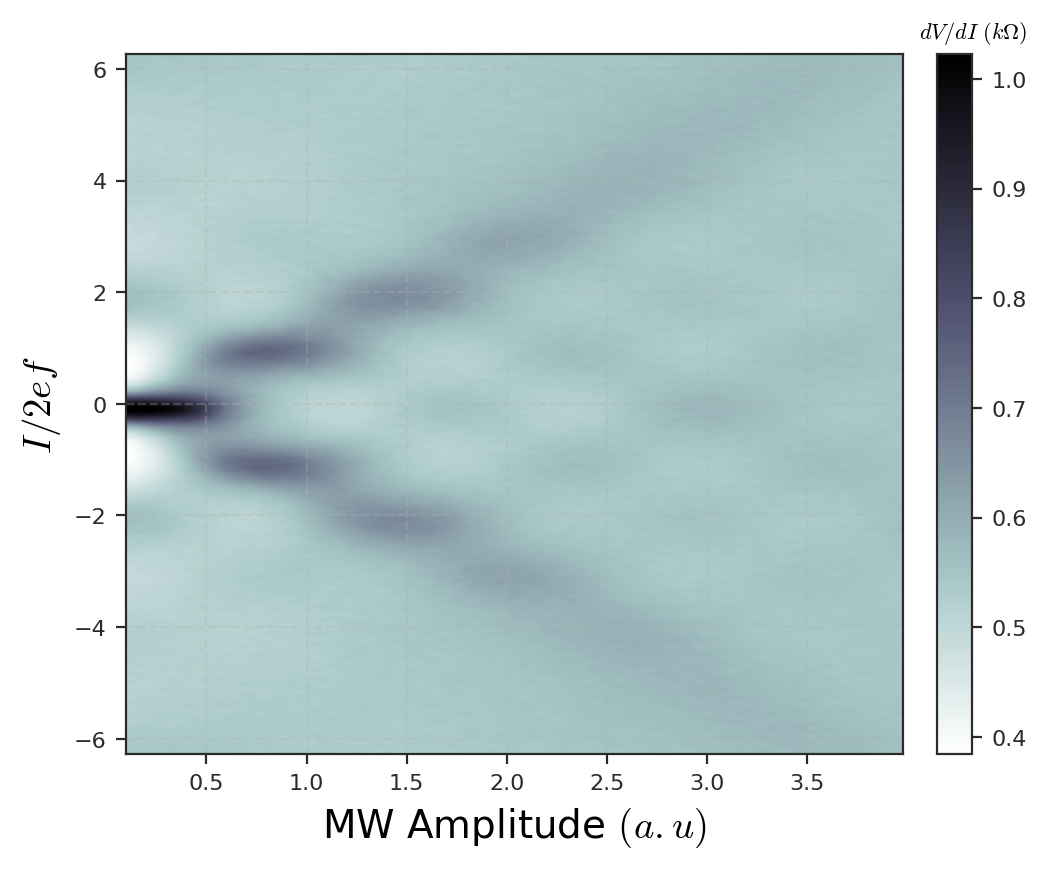

In [104]:
current_min = -6.748*nA
current_max = 6.73448*nA
freq = 3*GHz
current_calibration_factor = 1.12

LOWER_X = 0.1
UPPER_X = 3.9802
LOWER_Y = current_min / (2*e*freq) / current_calibration_factor
UPPER_Y = current_max / (2*e*freq) / current_calibration_factor

c_list = {
    "BrBG": cm.BrBG, 
    "Hot": cm.hot, 
    "Virdis": cm.viridis, 
    "Cividis": cm.cividis_r, 
    "Bone": cm.bone_r
}

for name, cmap in c_list.items():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    im = ax.imshow(
        data,
        extent=[LOWER_X, UPPER_X, LOWER_Y, UPPER_Y],
        origin='lower',
        cmap=cmap,
        aspect='auto',
        interpolation='bessel',
    )
    # # Annotation
    cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cb.ax.set_ylabel("$dV/dI\,\,(k\Omega)$", 
                     fontsize=8,
                     rotation=0, 
                     ha="right", 
                     labelpad=0, 
                     y=1.05)
    ax.set_xlabel("MW Amplitude $(a.u)$", fontsize=14)
    ax.set_ylabel("$I/2ef$", fontsize=14)
    plt.savefig(f"./data/2021-03-01_cqps-shapiro/plots/{name}.pdf")

In [ ]:
d